In [1]:
from xgboost import XGBClassifier
import pandas as pd  
import numpy as np  
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("IUBAT_Testing7.csv")
df.head()

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,Female,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
1,Male,18-25,2,607,N-W,25,14,4,2,320,2,31,72,446,Neutral,Good
2,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
3,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Warm,Very Good
4,Male,18-25,3,607,N-W,25,14,4,2,320,2,31,72,446,Slightly Cool,Very Good


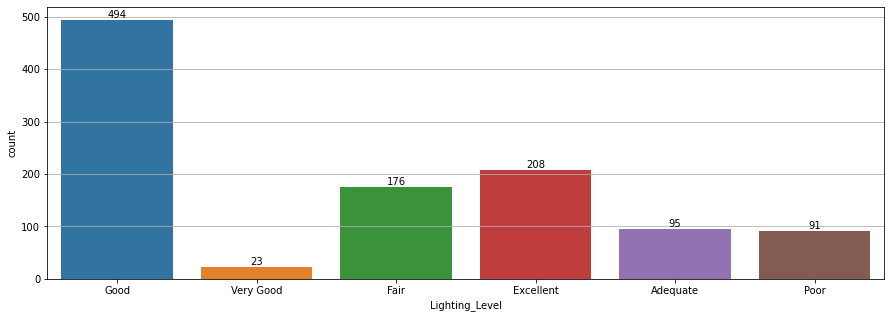

In [3]:
# Adding Values to Seaborn Count Plots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='Lighting_Level', )

for label in ax.containers:
    ax.bar_label(label)
    
plt.show()


In [4]:
df['Lighting_Level'].value_counts()

Good         494
Excellent    208
Fair         176
Adequate      95
Poor          91
Very Good     23
Name: Lighting_Level, dtype: int64

In [5]:
 #displaying categories of values for each column with its count
col_names = list(df.columns.values) #update columns names

for i in col_names:
    print(df[i].value_counts(dropna=False))

Male      663
Female    424
Name: Gender, dtype: int64
18-25    1009
26-30      78
Name: Age, dtype: int64
3    565
2    423
4     99
Name: Study_Level, dtype: int64
601     52
902     48
607     47
801     44
501     44
620     44
621     43
707     42
612     41
608     40
603     40
903     38
504     38
904     37
804     37
924     35
520     34
901     34
1003    34
604     33
803     30
905     29
1004    29
913     29
802     28
805     27
823     26
907     24
908     21
909     21
1002    18
Name: Room_No, dtype: int64
N-W    459
S-E    445
S-W    125
N-E     58
Name: Room_Orientation, dtype: int64
24    202
26    182
25    165
23    134
21    112
18     74
28     44
15     42
16     41
22     37
13     33
10     21
Name: No_Lights, dtype: int64
12    221
9     187
14    162
10    133
13    132
5      66
15     44
8      44
11     41
6      29
16     28
Name: No_Fans, dtype: int64
3    573
5    288
4    147
2     79
Name: No_Windows, dtype: int64
2    789
1    298
Name: No_Do

<AxesSubplot:>

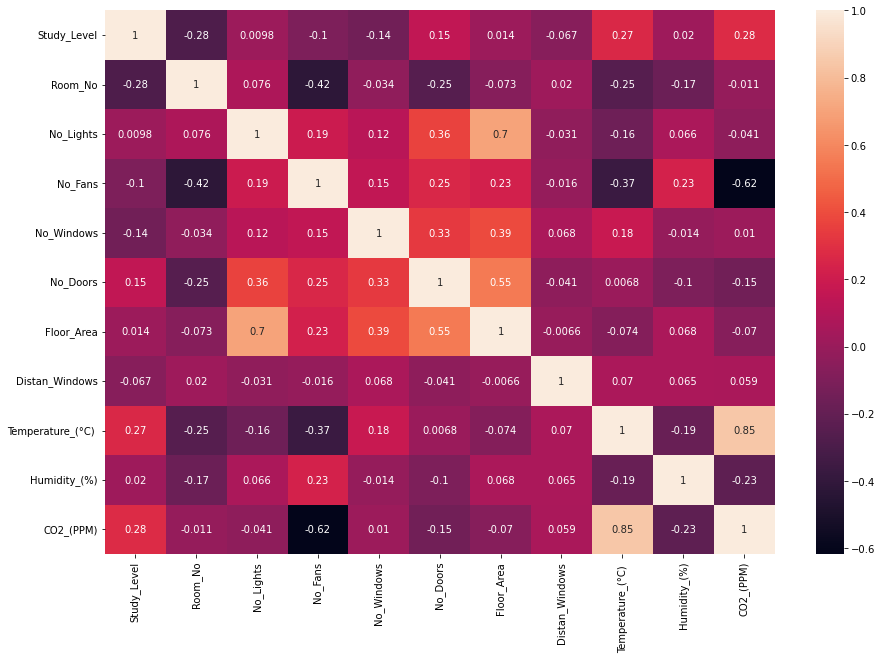

In [6]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [7]:
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

In [8]:
df.head()  

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level,Lighting_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2,1


In [9]:
#Filter any variables with low variance (close to zero) to avoid overfitting
df.var()

Gender                  0.238133
Age                     0.066669
Study_Level             0.391737
Room_No             25085.079254
Room_Orientation        0.711123
No_Lights              15.831979
No_Fans                 7.346655
No_Windows              0.917549
No_Doors                0.199175
Floor_Area            363.316001
Distan_Windows          1.924690
Temperature_(°C)        2.851991
Humidity_(%)           29.145839
CO2_(PPM)              15.096677
PMV_Level               3.561772
Lighting_Level          3.038354
dtype: float64

In [10]:
inputs = df.drop(['Lighting_Level',], axis='columns')

In [11]:
target = df['Lighting_Level']

In [12]:
inputs

,Gender,Age,Study_Level,Room_No,Room_Orientation,No_Lights,No_Fans,No_Windows,No_Doors,Floor_Area,Distan_Windows,Temperature_(°C),Humidity_(%),CO2_(PPM),PMV_Level
0,0,0,3,607,0,25,14,4,2,320,0,31,72,446,0
1,1,0,2,607,0,25,14,4,2,320,0,31,72,446,0
2,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
3,1,0,3,607,0,25,14,4,2,320,0,31,72,446,1
4,1,0,3,607,0,25,14,4,2,320,0,31,72,446,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0,0,3,504,0,21,12,5,2,320,3,30,63,447,3
1083,0,0,3,504,0,21,12,5,2,320,3,30,63,447,3
1084,1,0,3,504,0,21,12,5,2,320,2,30,63,447,0
1085,1,0,3,504,0,21,12,5,2,320,2,30,63,447,3


In [13]:
target

0       0
1       0
2       1
3       1
4       1
       ..
1082    0
1083    2
1084    3
1085    5
1086    0
Name: Lighting_Level, Length: 1087, dtype: uint8

In [14]:
from sklearn.model_selection import train_test_split
X = inputs  
y = target

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

In [16]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [17]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [18]:
y.value_counts()

1    494
2    494
3    494
4    494
5    494
0    480
Name: Lighting_Level, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [20]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error

rfc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.3, max_delta_step=0,
       max_depth=10, min_child_weight=1, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', 
       reg_alpha=0, reg_lambda=1,
       silent=None, subsample=1,verbosity=1)
print(rfc)
rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_predict))

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
              grow_policy=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=10, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy score: 0.6271186440677966


In [21]:
rfc.score(X_train, y_train)

0.823728813559322

In [22]:
y_predict = rfc.predict(X_test)

In [23]:
y_predict = rfc.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 2.45
RMSE: 1.56


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report

# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
print("Confusion matrix:")
print(cm)


Accuracy: 0.6271186440677966
Confusion matrix:
[[44  2 14 21  7 12]
 [ 4 96  1  1  0  1]
 [14  2 59  3 19  3]
 [17  2  8 44  9  6]
 [ 7  0 10 10 62 15]
 [ 3  4  6  2 17 65]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.49      0.44      0.47       100
           1       0.91      0.93      0.92       103
           2       0.60      0.59      0.60       100
           3       0.54      0.51      0.53        86
           4       0.54      0.60      0.57       104
           5       0.64      0.67      0.65        97

    accuracy                           0.63       590
   macro avg       0.62      0.62      0.62       590
weighted avg       0.62      0.63      0.62       590



In [26]:
#Lets encode target labels (y) with values between 0 and n_classes-1.
#We will use the LabelEncoder to do this. 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

In [27]:
y_predict = rfc.predict(X_test)
pred_prob = rfc.predict_proba(X_test)

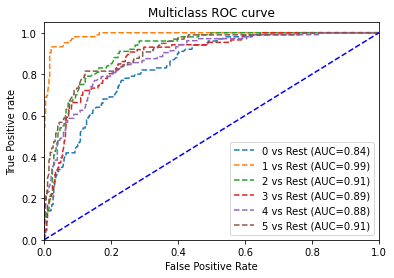

In [28]:
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [29]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, rfc.predict_proba(X_test))
logloss

0.9775938616095908

Text(0.5, 1.0, 'Random Forest Feature Importances (MDI)')

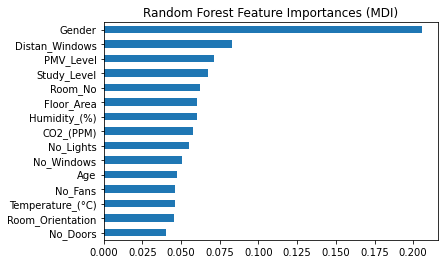

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
feat_importances = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh')
plt.title('Random Forest Feature Importances (MDI)')

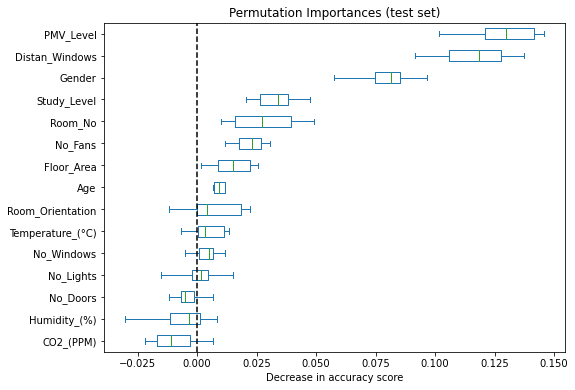

<Figure size 1800x1080 with 0 Axes>

In [31]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

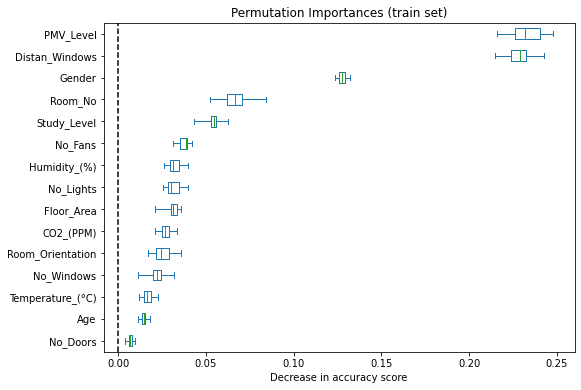

<Figure size 1800x1080 with 0 Axes>

In [32]:
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

import matplotlib.pyplot as plt
fig = plt.gcf()
plt.figure(figsize=(25,15))
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)

In [33]:
import numpy as np
import pandas as pd

In [34]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


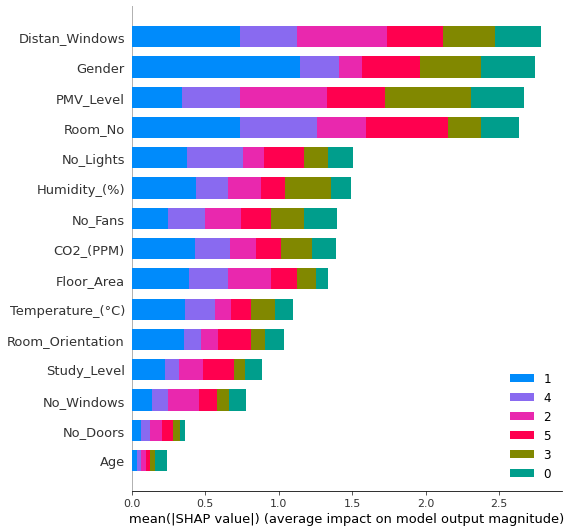

In [35]:
import shap
shap.summary_plot(shap_values, X_test, plot_type="bar", class_names=rfc.classes_)

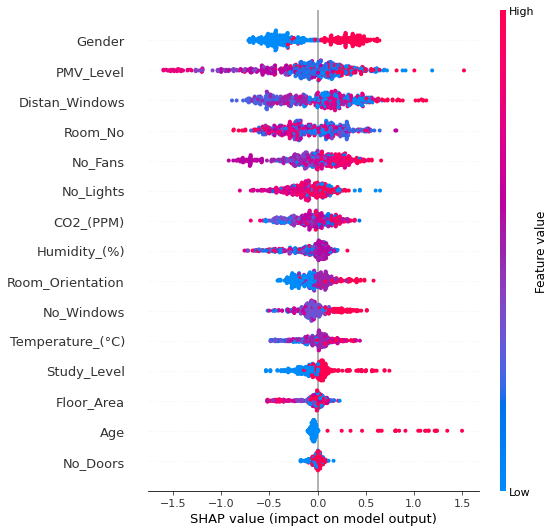

In [36]:
shap.summary_plot(shap_values[0], X_test)

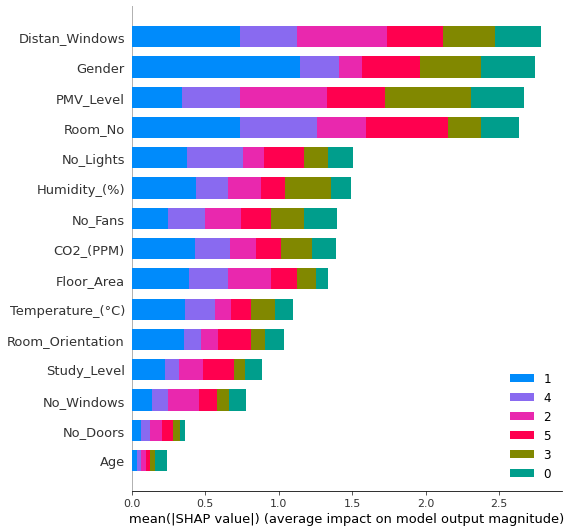

In [37]:
shap.summary_plot(shap_values, X_train, class_names=rfc.classes_ )

In [38]:
#importing random forest classifier and recursive feature elemenation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

scores = []
for i in range(1,X.shape[1]):
    rfc = RFE(xgb.XGBClassifier(verbosity=1), n_features_to_select= i)
    rfc.fit(X_train, y_train)

    y_predict = rfc.predict(X_test)
    #printing the number of selected features and its accuracy after each iteration
    print('Number of Selected features: ', i)
    sc = accuracy_score(y_test, y_predict)
    print('accuracy score:', sc)
    print()
    scores.append(sc)

Number of Selected features:  1
accuracy score: 0.27288135593220336

Number of Selected features:  2
accuracy score: 0.28983050847457625

Number of Selected features:  3
accuracy score: 0.376271186440678

Number of Selected features:  4
accuracy score: 0.4559322033898305

Number of Selected features:  5
accuracy score: 0.46440677966101696

Number of Selected features:  6
accuracy score: 0.4711864406779661

Number of Selected features:  7
accuracy score: 0.4745762711864407

Number of Selected features:  8
accuracy score: 0.4745762711864407

Number of Selected features:  9
accuracy score: 0.48135593220338985

Number of Selected features:  10
accuracy score: 0.47966101694915253

Number of Selected features:  11
accuracy score: 0.47627118644067795

Number of Selected features:  12
accuracy score: 0.5203389830508475

Number of Selected features:  13
accuracy score: 0.5932203389830508

Number of Selected features:  14
accuracy score: 0.6491525423728813



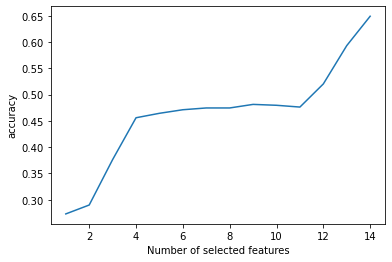

In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("accuracy")
plt.plot(
    range(1, 15),
    scores,
)
plt.show()

In [40]:
rfc.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [41]:
features = X_train.columns[rfc.get_support()]
features

Index(['Gender', 'Study_Level', 'Room_No', 'Room_Orientation', 'No_Lights',
       'No_Fans', 'No_Windows', 'No_Doors', 'Floor_Area', 'Distan_Windows',
       'Temperature_(°C)', 'Humidity_(%)', 'CO2_(PPM)', 'PMV_Level'],
      dtype='object')

In [42]:
excluded_feature = list(set(X_train.columns) - set(features))
print(excluded_feature)

['Age']


In [43]:
#drop features from X
X = X.drop(['Age'], axis=1)

In [44]:
#updating train & test sets
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = xgb.XGBClassifier(verbosity=1)
rfe = RFECV(
    estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,
)
rfe.fit(X_train,y_train)

print(f"Optimal number of features: {rfe.n_features_}")

Optimal number of features: 14


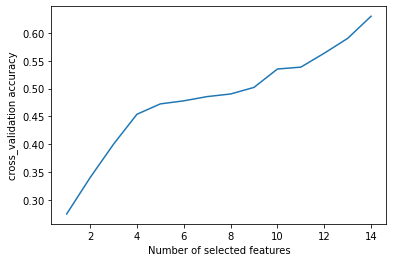

In [46]:
n_scores = len(rfe.cv_results_)
plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("cross_validation accuracy")
plt.plot(
    range (1,len (rfe.cv_results_["mean_test_score"])+1),
    rfe.cv_results_["mean_test_score"],)

plt.show()

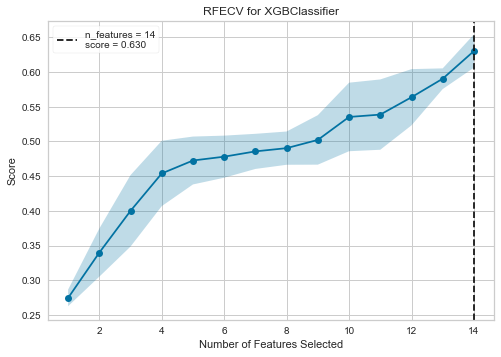

<AxesSubplot:title={'center':'RFECV for XGBClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [47]:

from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV

# Instantiate RFECV visualizer with a linear DT classifier
visualizer = RFECV(estimator=rfc,
    step=1,
    cv=StratifiedKFold(5),
    scoring="accuracy",
    min_features_to_select=1,)

visualizer.fit(X_train,y_train)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

In [48]:
#Max_Depth
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from matplotlib import pyplot

for depth in [1,2,3,4,5,6,7,8,10, 15,16, 17, ]:
    rfc = XGBClassifier(max_depth=depth)
    rfc.fit(X_train, y_train)
    print(f'Max_Depth: {depth}. Score: {rfc.score(X_train, y_train)}')

Max_Depth: 1. Score: 0.48177966101694913
Max_Depth: 2. Score: 0.6241525423728813
Max_Depth: 3. Score: 0.7110169491525423
Max_Depth: 4. Score: 0.7682203389830509
Max_Depth: 5. Score: 0.8114406779661016
Max_Depth: 6. Score: 0.826271186440678
Max_Depth: 7. Score: 0.8300847457627119
Max_Depth: 8. Score: 0.8300847457627119
Max_Depth: 10. Score: 0.8305084745762712
Max_Depth: 15. Score: 0.8305084745762712
Max_Depth: 16. Score: 0.8305084745762712
Max_Depth: 17. Score: 0.8305084745762712
Max_Depth: 18. Score: 0.8305084745762712
Max_Depth: 19. Score: 0.8305084745762712
Max_Depth: 20. Score: 0.8305084745762712
Max_Depth: 21. Score: 0.8305084745762712
Max_Depth: 22. Score: 0.8305084745762712
Max_Depth: 23. Score: 0.8305084745762712
Max_Depth: 50. Score: 0.8305084745762712


In [49]:
#learning_rate
for rate in [0.9,0.8, 0.7, 0.6, 0.5,0.4,0.3, 0.2, 0.1,0.01]:
    rfc = XGBClassifier(learning_rate=rate)
    rfc.fit(X_train, y_train)
    print(f'learning_rate: {rate}. Score: {rfc.score(X_train, y_train)}')

learning_rate: 0.9. Score: 0.8305084745762712
learning_rate: 0.8. Score: 0.8305084745762712
learning_rate: 0.7. Score: 0.8305084745762712
learning_rate: 0.6. Score: 0.8296610169491525
learning_rate: 0.5. Score: 0.8296610169491525
learning_rate: 0.4. Score: 0.8292372881355933
learning_rate: 0.3. Score: 0.826271186440678
learning_rate: 0.2. Score: 0.8161016949152542
learning_rate: 0.1. Score: 0.7800847457627119
learning_rate: 0.01. Score: 0.648728813559322


In [50]:
#min_child_weight

for min_child_weight in [0,1,2,3,4,5,6]:
    rfc = XGBClassifier(min_child_weight=min_child_weight)
    rfc.fit(X_train, y_train)
    print(f'min_child_weight: {min_child_weight}. Score: {rfc.score(X_train, y_train)}')

min_child_weight: 0. Score: 0.8266949152542373
min_child_weight: 1. Score: 0.826271186440678
min_child_weight: 2. Score: 0.823728813559322
min_child_weight: 3. Score: 0.8182203389830508
min_child_weight: 4. Score: 0.8105932203389831
min_child_weight: 5. Score: 0.8008474576271186
min_child_weight: 6. Score: 0.7995762711864407


In [51]:
#gamma

for gamma in [0,1,2,3,4,5,6,]:
    rfc = XGBClassifier(gamma=gamma)
    rfc.fit(X_train, y_train)
    print(f'gamma: {gamma}. Score: {rfc.score(X_train, y_train)}')

gamma: 0. Score: 0.826271186440678
gamma: 1. Score: 0.7487288135593221
gamma: 2. Score: 0.711864406779661
gamma: 3. Score: 0.6677966101694915
gamma: 4. Score: 0.6398305084745762
gamma: 5. Score: 0.6343220338983051
gamma: 6. Score: 0.6029661016949153
gamma: 7. Score: 0.5847457627118644
gamma: 8. Score: 0.5686440677966101
gamma: 10. Score: 0.5245762711864407
gamma: 11. Score: 0.5292372881355932
gamma: 12. Score: 0.5186440677966102
gamma: 15. Score: 0.5050847457627119
gamma: 20. Score: 0.4711864406779661
gamma: 50. Score: 0.34152542372881356


In [52]:
#max_delta_step

for max_delta_step in [0,1,2,3,4,5]:
    rfc = XGBClassifier(max_delta_step=max_delta_step)
    rfc.fit(X_train, y_train)
    print(f'max_delta_step: {max_delta_step}. Score: {rfc.score(X_train, y_train)}'),

max_delta_step: 0. Score: 0.826271186440678
max_delta_step: 1. Score: 0.8241525423728814
max_delta_step: 2. Score: 0.8245762711864407
max_delta_step: 3. Score: 0.826271186440678
max_delta_step: 4. Score: 0.826271186440678
max_delta_step: 5. Score: 0.826271186440678


In [53]:
#subsample

for subsample in [0.1,0.2,0.3,0.4, 0.5, 1]:
    rfc = XGBClassifier(subsample=subsample)
    rfc.fit(X_train, y_train)
    print(f'subsample: {subsample}. Score: {rfc.score(X_train, y_train)}'),

subsample: 0.1. Score: 0.7211864406779661
subsample: 0.2. Score: 0.7758474576271186
subsample: 0.3. Score: 0.7957627118644067
subsample: 0.4. Score: 0.8144067796610169
subsample: 0.5. Score: 0.8211864406779661
subsample: 1. Score: 0.826271186440678


In [54]:
from xgboost import XGBClassifier
from xgboost import plot_tree

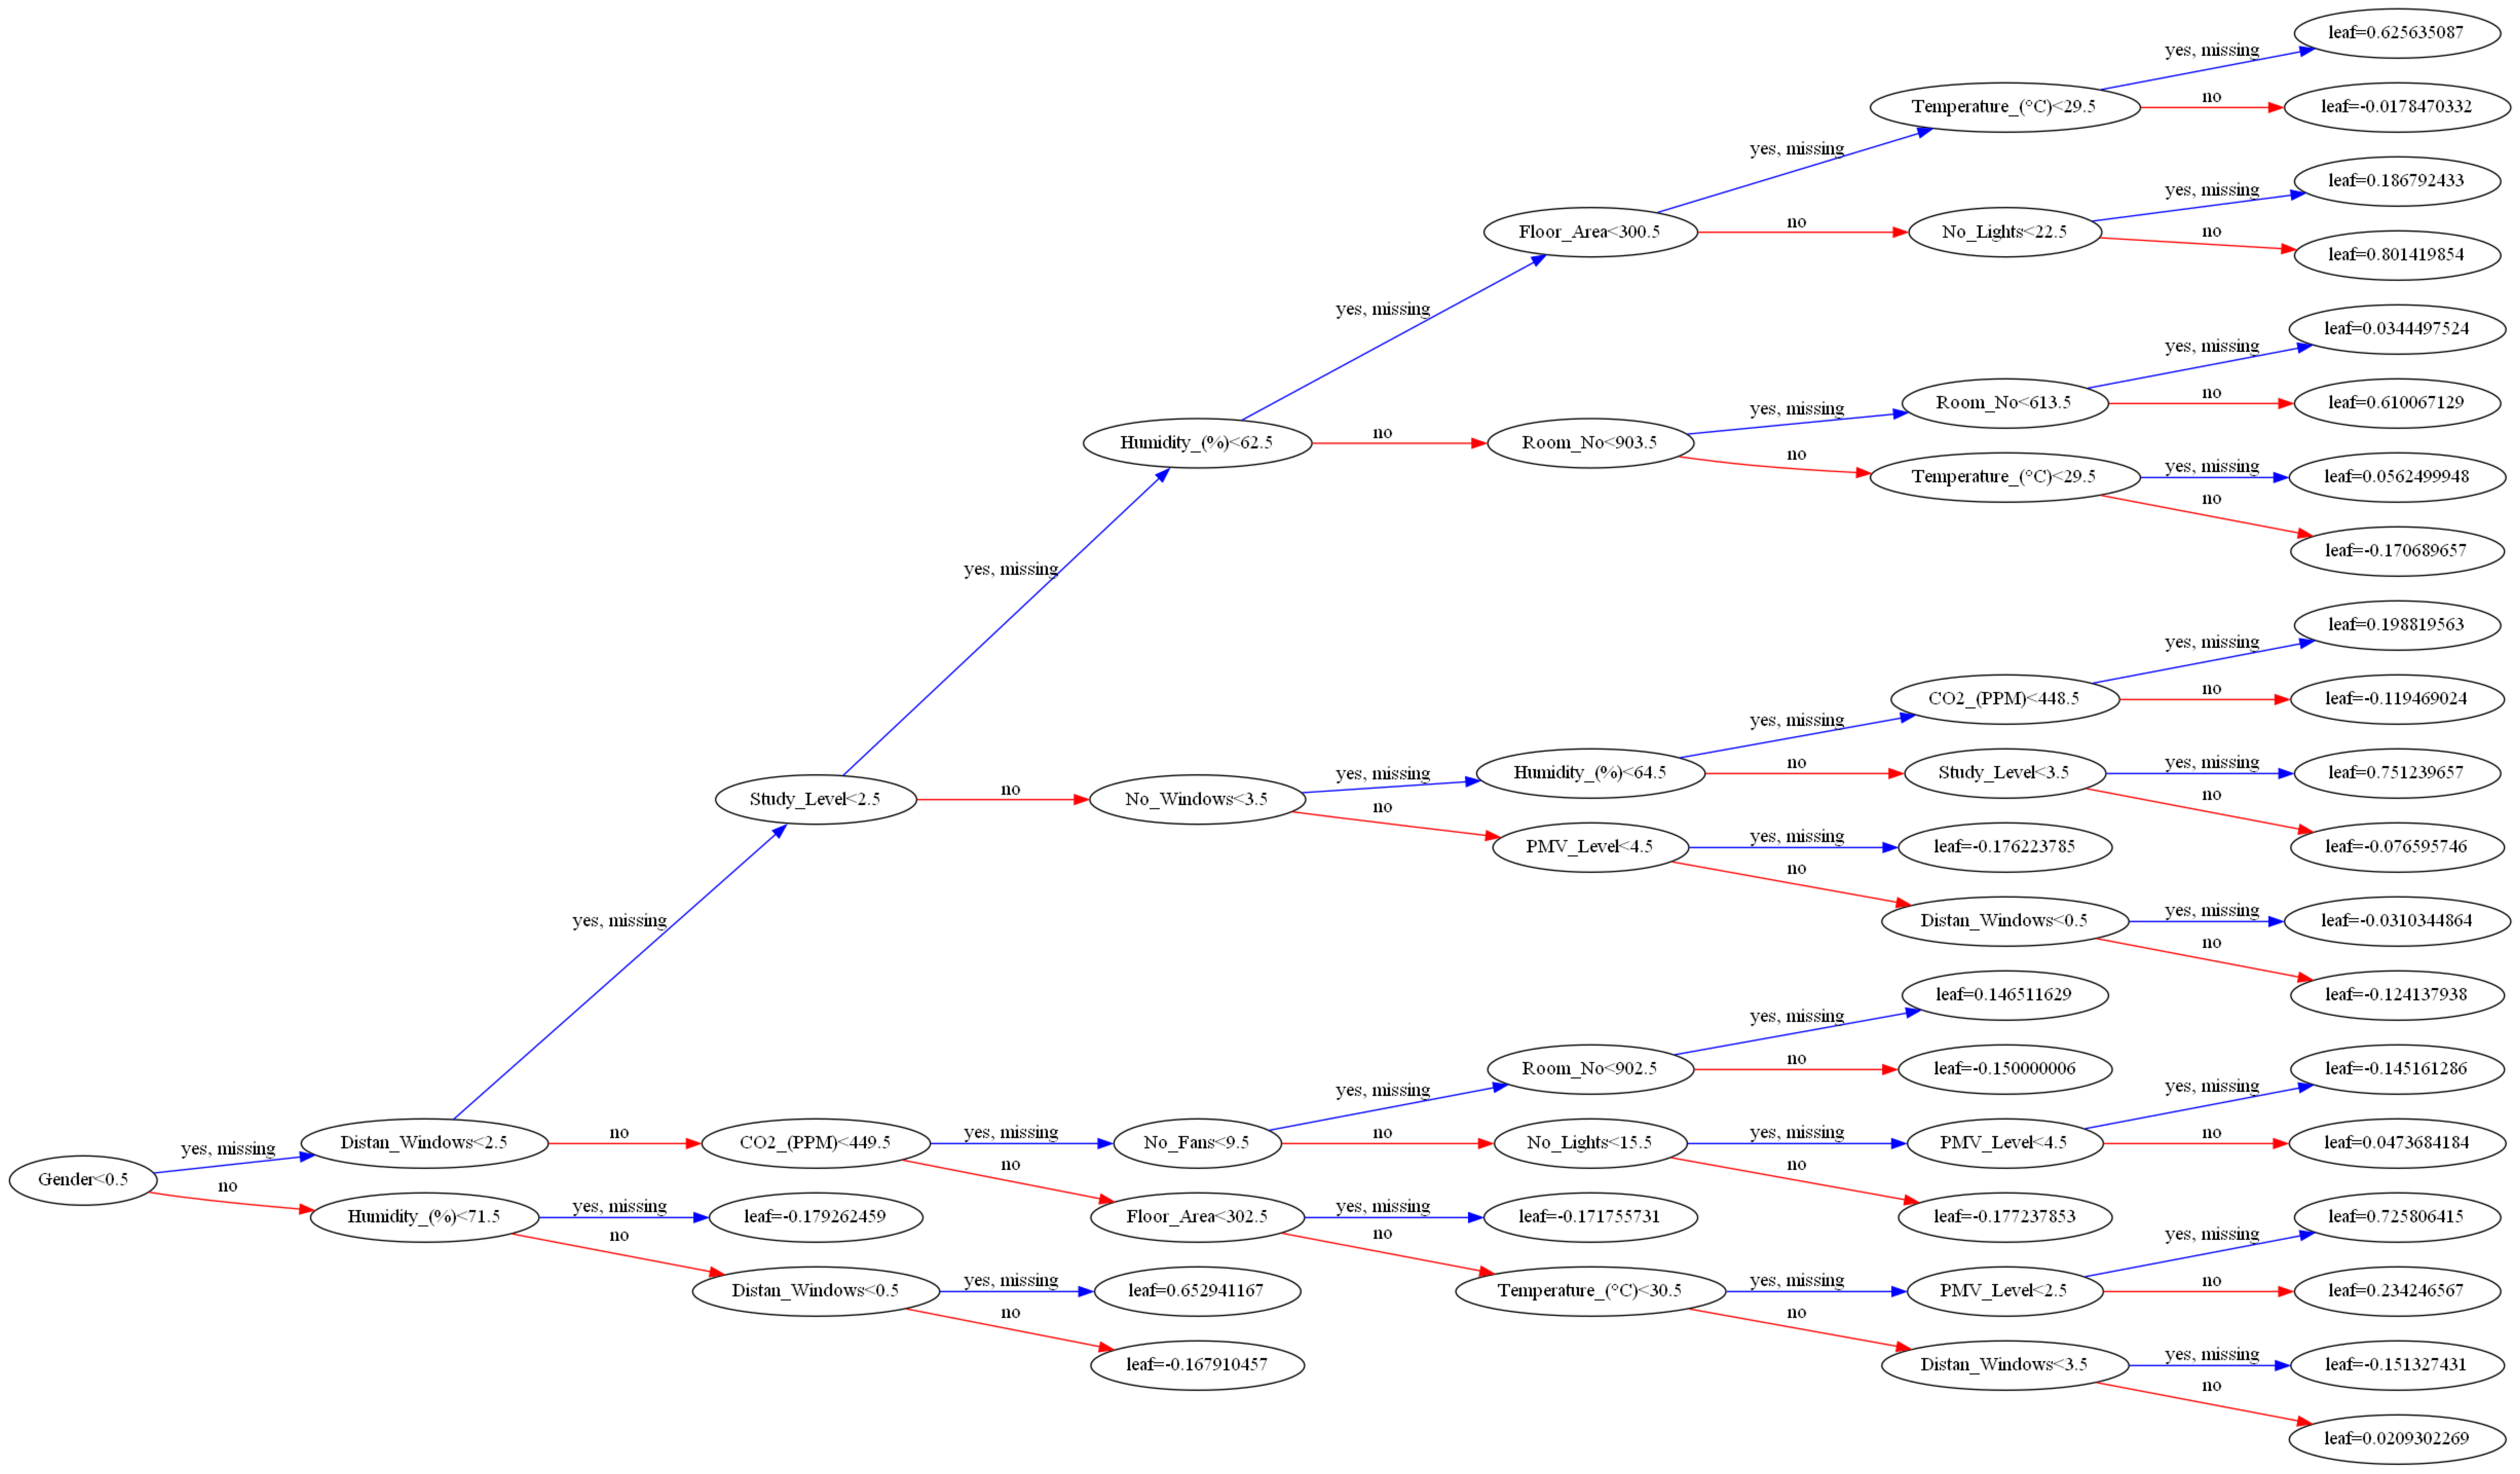

In [62]:
%matplotlib inline
from xgboost import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,120
plot_tree(rfc, num_trees=1,rankdir='LR')
fig = plt.gcf()